<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/Poker_Hand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Poker Hand Data Set***

Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4.


---


*Attribute Information*:

1) S1 "Suit of card #1"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

2) C1 "Rank of card #1"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

3) S2 "Suit of card #2"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

4) C2 "Rank of card #2"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

5) S3 "Suit of card #3"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

6) C3 "Rank of card #3"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

7) S4 "Suit of card #4"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

8) C4 "Rank of card #4"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

9) S5 "Suit of card #5"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

10) C5 "Rank of card 5"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

11) CLASS "Poker Hand"
Ordinal (0-9)



0: Nothing in hand; not a recognized poker hand

1: One pair; one pair of equal ranks within five cards

2: Two pairs; two pairs of equal ranks within five cards

3: Three of a kind; three equal ranks within five cards

4: Straight; five cards, sequentially ranked with no gaps

5: Flush; five cards with the same suit

6: Full house; pair + different rank three of a kind

7: Four of a kind; four equal ranks within five cards

8: Straight flush; straight + flush

9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush



In [ ]:
import numpy as np #helps in mathematical operations
import matplotlib.pyplot as plt #helps in plotting of graph
import pandas as pd #helps in making dataframes and importing csv files
import seaborn as sns # helps in data visualization

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') #to mount the drive data into colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Practical Exam"

/content/drive/My Drive/Colab Notebooks/Practical Exam


In [ ]:
#Reading the csv file
columnname = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Class']
dataset=pd.read_excel("poker-hand-training.xlsx",names=columnname)
dataset.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


Text(0.5, 1.0, 'Correlation Heatmap of Featrues')

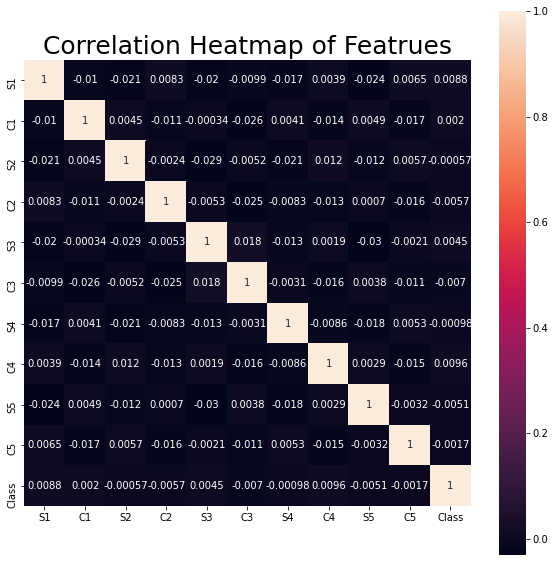

In [ ]:
#Plotting the correlation graph between all the features.
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,square=True)
plt.title('Correlation Heatmap of Featrues',size=25)

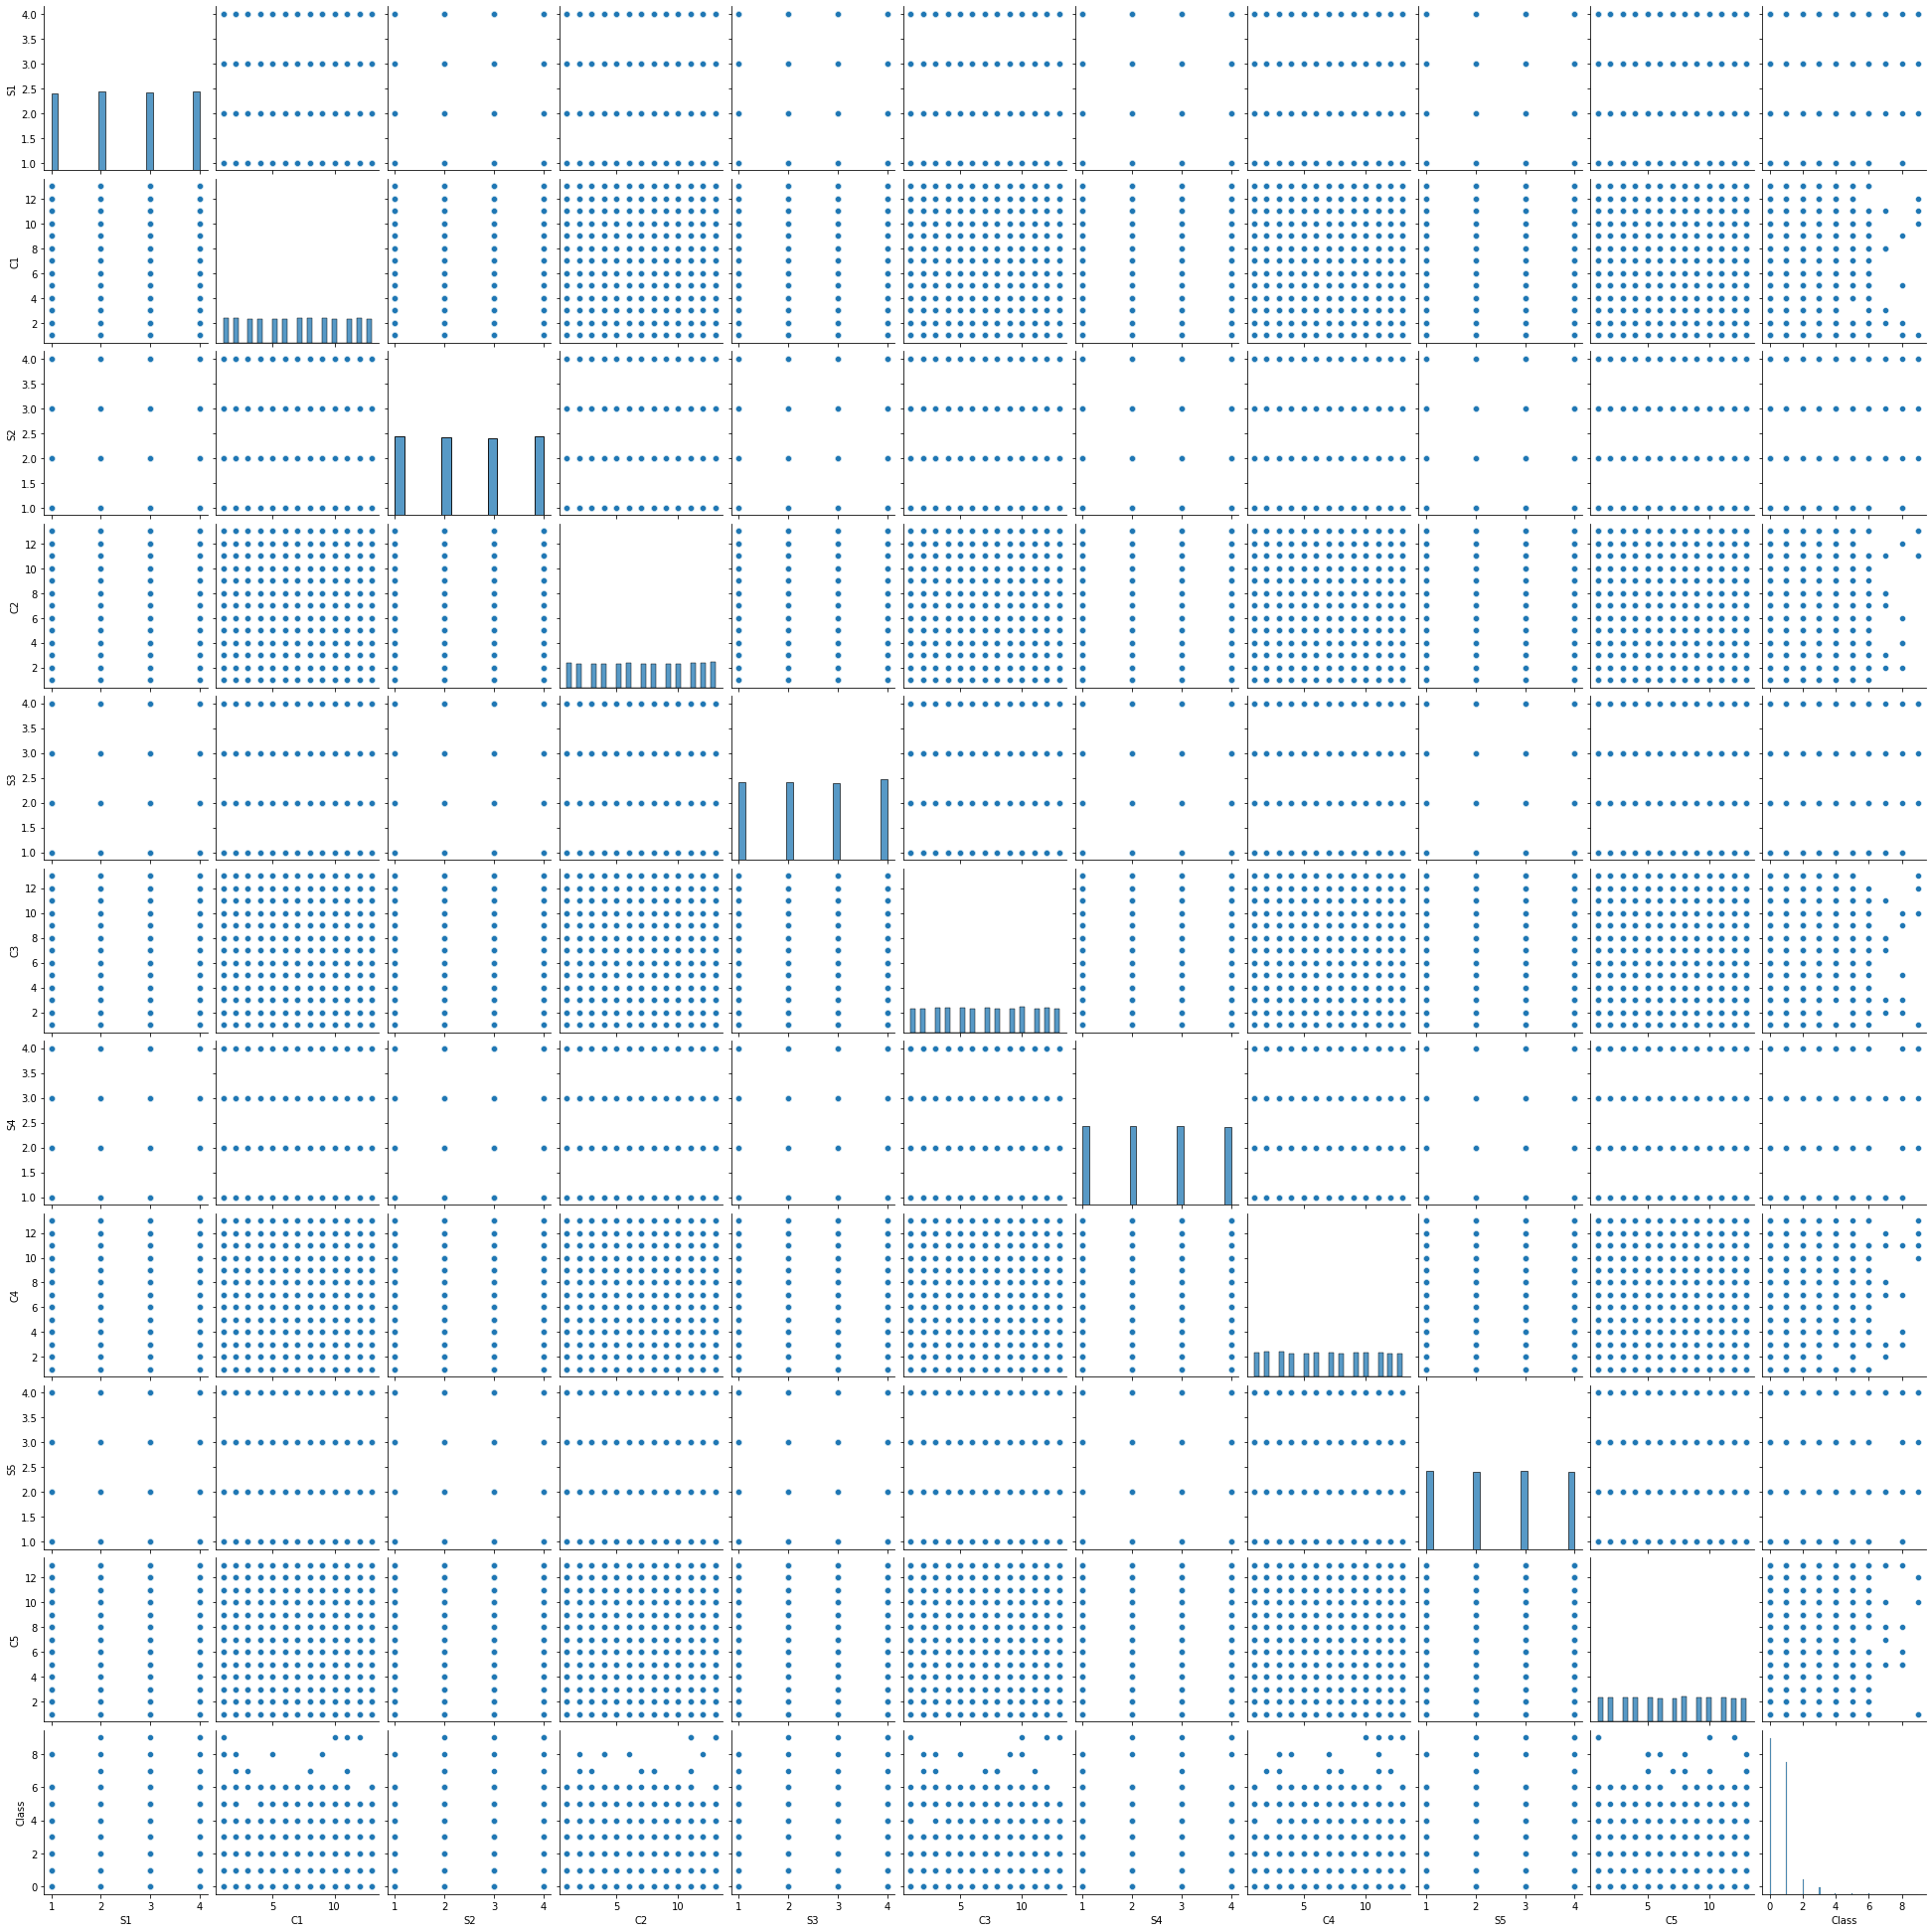

In [ ]:
sns.pairplot(dataset)

In [ ]:
col=['S1','S2','S3','S4','S5']
for i in col:
    dataset[i]=dataset[i].astype('category')

In [ ]:
dataset=pd.get_dummies(dataset)

In [ ]:
dataset

,C1,C2,C3,C4,C5,Class,S1_1,S1_2,S1_3,S1_4,S2_1,S2_2,S2_3,S2_4,S3_1,S3_2,S3_3,S3_4,S4_1,S4_2,S4_3,S4_4,S5_1,S5_2,S5_3,S5_4
0,11,13,10,12,1,9,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,12,11,13,10,1,9,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
2,10,11,1,13,12,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,1,13,12,11,10,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,2,4,5,3,6,8,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25004,9,6,11,12,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
25005,1,10,13,4,10,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
25006,1,10,4,1,13,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
25007,12,3,10,12,9,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X = dataset.drop('Class',axis=1) #Making the feature matrix
Y = dataset[['Class']]#making the target variable

In [ ]:
X

,C1,C2,C3,C4,C5,S1_1,S1_2,S1_3,S1_4,S2_1,S2_2,S2_3,S2_4,S3_1,S3_2,S3_3,S3_4,S4_1,S4_2,S4_3,S4_4,S5_1,S5_2,S5_3,S5_4
0,11,13,10,12,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,12,11,13,10,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
2,10,11,1,13,12,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,1,13,12,11,10,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,2,4,5,3,6,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25004,9,6,11,12,4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
25005,1,10,13,4,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
25006,1,10,4,1,13,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
25007,12,3,10,12,9,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
Y

,Class
0,9
1,9
2,9
3,9
4,8
...,...
25004,0
25005,1
25006,1
25007,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Dividing the dataset into training dataset and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
#importing the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
#creating the Linear regression model
linear_reg_model = LinearRegression()

In [ ]:
#fit the model with the given training dataset
linear_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lr = linear_reg_model.predict(X_test)#Predicting the values using the linear regression model.

In [ ]:
y_pred_lr

array([[0.63239187],
       [0.60346952],
       [0.62365985],
       ...,
       [0.59013467],
       [0.60948261],
       [0.67712038]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy for linear regressor model is: ",linear_reg_model.score(X_test,Y_test))

Accuracy for linear regressor model is:  -0.0023036346971312405


Here as we can see the linear regressor model does not work well.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
desicion_tree_model = DecisionTreeClassifier(random_state=0)
desicion_tree_model.fit(X_train,Y_train)
y_pred_dt = desicion_tree_model.predict(X_test)
print("The accuracy for desicion tree is: ",accuracy_score(Y_test,y_pred_dt))

The accuracy for desicion tree is:  0.4835399173663868


The accuracy of desicion tree is better then linear regression but is still very low.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=1000,random_state=0)
random_forest_model.fit(X_train,Y_train)
y_pred_rf = random_forest_model.predict(X_test)
print(random_forest_model.score(X_test,Y_test))
print("The accuracy for random forest is: ",accuracy_score(Y_test,y_pred_rf))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5756364121018259
The accuracy for random forest is:  0.5756364121018259


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_model = PolynomialFeatures(degree = 2)
X_poly = polynomial_model.fit_transform(X_train)
polynomial_model = polynomial_model.fit(X_poly, Y_train)
y_pred_pr = lin2.predict(polynomial_model.fit_transform(X_test))

In [ ]:
y_pred_pr

array([[0.46477962],
       [0.71537739],
       [0.93212861],
       ...,
       [0.48327661],
       [0.74434823],
       [0.5179072 ]])

In [ ]:
print("The accuracy for polynomial regression is: ",lin2.score(polynomial_model.fit_transform(X_test),Y_test))

The accuracy for polynomial regression is:  0.05764050494179873


In [ ]:
#importing the KNN classifier model from sklearn
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  1 is:  0.5196588031454085


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  2 is:  0.5579101692656271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  3 is:  0.5513794482207117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  4 is:  0.5741703318672531


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  5 is:  0.5692389710782354


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  6 is:  0.580301212848194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  7 is:  0.568172730907637


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  8 is:  0.5812341729974677


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  9 is:  0.5748367319738771


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  10 is:  0.5834999333599893


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  11 is:  0.5797680927628949


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  12 is:  0.5829668132746901


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  13 is:  0.5793682526989204


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  14 is:  0.5836332133813141


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  15 is:  0.5811008929761429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  16 is:  0.5825669732107157


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  17 is:  0.5817672930827669


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  18 is:  0.5842996134879381


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  19 is:  0.5849660135945621


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of the model for k =  20 is:  0.5853658536585366


Text(0, 0.5, 'Accuracy')

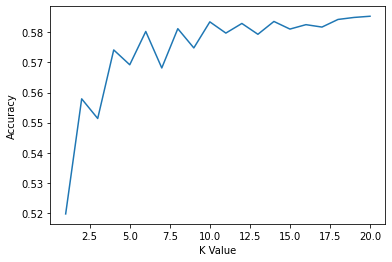

In [ ]:
#Now we are taking values of K from 1 to 20 and are checking the performance of the model.
accuracy = []
k = [i for i in range(1,21)]
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  prediction_model = knn.predict(X_test)
  
  #Calculating the accuracy, precision and recall of the model
  accuracy.append(accuracy_score(Y_test, prediction_model))
  print("Accuracy of the model for k = ",i,"is: ",accuracy_score(Y_test, prediction_model))

plt.plot(k,accuracy)
plt.xlabel("K Value")
plt.ylabel("Accuracy")

The highest accuracy achieved is by KNN which is: 58.5%